# Supervised Learning

## 1. Logistic Regression
--- 
#### 1.1 Consider the average empirical loss (the risk) for logistic regression:
   $$J(\theta) = \frac{1}{m} \sum_{i = 1}^m\,log(1 + e^{-y^{(i)}\theta^{T}x^{(i)}}) = - \frac{1}{m} \sum_{i = 1}^m\,log(h_\theta(y^{(i)}\theta^Tx^{(i)}))$$
   where $y^{(i)}\,\in\, \{-1, 1\},\, h_\theta(x) = g(\theta^Tx)\, and \,g(z) = 1\,/\,(1+e^{-z}).$ Find the Hessian $H$ of this function, and show that for any vector $z$, it holds true that $$z^THz\geq 0.$$

---
Let's calculate the first derivative of $J(\theta)$ first. Using the chain rule, we could have
$$\frac{\partial}{\partial\theta}J(\theta) = -\frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial\theta}log(h_\theta(y^{(i)}x^{(i)})) $$
$$ = - \frac{1}{m} \sum_{i = 1}^m \frac {1} {h_\theta(y^{(i)}x^{(i)})} \, \frac{\partial}{\partial\theta} h_\theta(y^{(i)}x^{(i)})$$
Since we've already known that $g'(z) = g(z)(1-g(z))$, therefore
$$ = - \frac{1}{m} \sum_{i = 1}^m \frac {1} {h_\theta(y^{(i)}x^{(i)})}\, h_\theta(y^{(i)}x^{(i)})\, (1 - h_\theta(y^{(i)}x^{(i)})) \frac{\partial}{\partial\theta} y^{(i)}\theta^Tx^{(i)} $$
$$ = - \frac{1}{m} \sum_{i = 1}^m  (1 - h_\theta(y^{(i)}x^{(i)}))y^{(i)}x^{(i)} $$

Then let's find the Hessian matrix
$$H = \frac {\partial^2}{\partial \theta^2} J(\theta) = - \frac{1}{m} \sum_{i = 1}^m  \frac {\partial}{\partial \theta} (1 - h_\theta(y^{(i)}x^{(i)}))y^{(i)}x^{(i)}$$
$$ = - \frac{1}{m} \sum_{i = 1}^m  \frac {\partial}{\partial \theta} y^{(i)}x^{(i)} + \frac{1}{m} \sum_{i = 1}^m  \frac {\partial}{\partial \theta}y^{(i)}x^{(i)}   h_\theta(y^{(i)}x^{(i)}))$$

$$ = 0 + \frac{1}{m} \sum_{i = 1}^m  h_\theta(y^{(i)}x^{(i)})\, (1 - h_\theta(y^{(i)}x^{(i)})) {y^{(i)}}^2 \frac{\partial}{\partial\theta} x^{(i)} y^{(i)}(\theta^Tx^{(i)}) $$
Since ${y^2 = 1}$, Hessian matrix shoule be
$$ = \frac{1}{m} \sum_{i = 1}^m  {y^{(i)}}^2{x^{(i)}}{x^{(i)}}^T h_\theta(y^{(i)}x^{(i)})\, (1 - h_\theta(y^{(i)}x^{(i)}))$$
It's obvious that  $\frac{1}{m} {y^{(i)}}^2 h_\theta(t)\, (1 - h_\theta(t)) > 0$ for any $t$, ${x^{(i)}}^2{x^{(i)}}^2$ is outer product; So $H \succeq 0$. It's _positive semidefinite_

---
#### 1.2 We have provided two data files:
   - [trainingset_x](data/logistic_x.txt)
   - [trainingset_y](data/logistic_y.txt)
   
These files contains the inputs ($x^{(i)} \in \mathbb{R}^2 $) and outputs ($y^{(i)} \in \{-1, 1\}$), respectively for a binary classification problem. Implement Newton's method for optimizing $J(\theta)$, and apply it to fit a logistic regression model to the data. Initialize Newton's method with $\theta = 0$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load dataset
train_x_raw = np.loadtxt('data/logistic_x.txt')
train_y = np.loadtxt('data/logistic_y.txt')

In [3]:
# prepare color 
c = np.empty_like(train_y, dtype=str)
c[train_y < 0] = 'r'
c[train_y > 0] = 'b'

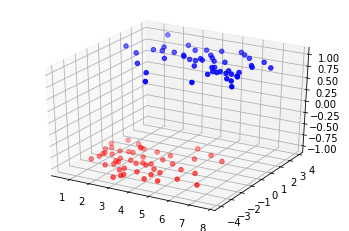

In [4]:
# draw scatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_x_raw[:,0], train_x_raw[:,1], train_y, c = c)

In [5]:
# add dummy x
train_x = np.ones((train_x_raw.shape[0], train_x_raw.shape[1] + 1))
train_x[...,:train_x_raw.shape[1]] = train_x_raw

In [6]:
# prepare functions
cost_func = lambda h_theta_x: -1 * np.mean( np.log(h_theta_x) )
yx_func = lambda train_x, train_y: np.diag(train_y) @ train_x
h_theta_x_fun = lambda yx, theta: 1/( 1 + np.exp(-1 * yx @ theta))
first_del_func = lambda yx, h_theta_x: -1 * np.diag(1 - h_theta_x) @ yx
hessian_func = lambda train_x, h_theta_x: np.mean(((np.diag(np.diag(h_theta_x) @ (1 - h_theta_x))) @ train_x)[:,:,None] * train_x[:,None,:], axis = 0)

In [7]:
# evaluate function
res = []
def judge_func(train_x, theta, train_y):
    global res
    h_theta_x = h_theta_x_fun(train_x, theta)
    res = np.ones_like(train_y)
    res[h_theta_x < (1 - h_theta_x)] = -1
    return np.sum(res[res > train_y]), np.sum(res[res < train_y]) * -1

(99, 3)
[ 0.76037154  1.17194674 -2.6205116 ]


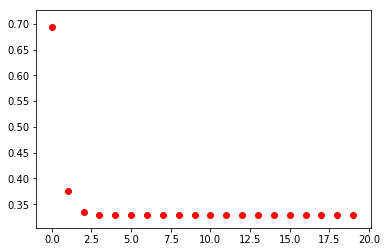

In [8]:
# trainning process

alpha = 1
tlr = 1
theta = [0, 0, 0]
yx = yx_func(train_x, train_y)
cost = []
print (yx.shape)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(20):
    h_theta_x = h_theta_x_fun(yx, theta)
    cost.append(cost_func(h_theta_x))
    first_del = np.mean(first_del_func(yx, h_theta_x), axis = 0)
    hessian = hessian_func(train_x, h_theta_x)
    theta -= alpha * np.linalg.inv(hessian) @ first_del
    ax2.scatter(i, cost[-1], c = 'r')
    
print (theta)

In [9]:
# evaluate
print("The Error rate is %f, %f" % (judge_func(train_x, theta, train_y)))

The Error rate is 5.000000, 6.000000


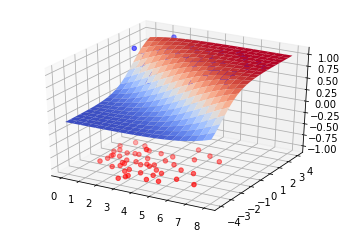

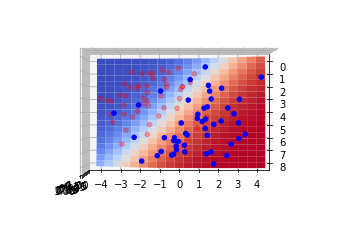

<Figure size 432x288 with 0 Axes>

In [18]:
# draw output in 3D
x1 = np.linspace(0,8,20)
x2 = np.linspace(-4, 4, 20)
X1,X2 = np.meshgrid(x1,x2)
Z = 1/(np.exp(-1 * (X1 * theta[0] + X2 * theta[1] + theta[2])) + 1)
ax.cla()
ax.scatter(train_x_raw[:,0], train_x_raw[:,1], train_y, c = c)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.coolwarm)
ax.view_init(30, )
plt.draw()
display(fig)

ax.view_init(90, 0)
plt.draw()
display(fig)

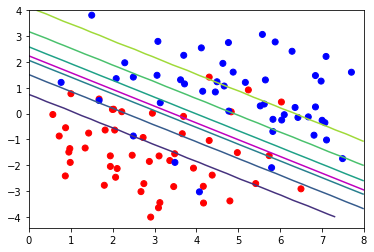

In [24]:
# draw ouput in 2D
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(train_x[:,0], train_x[:,1], c = c)
x1 = np.linspace(0,8,2)
x2 = (- theta[0] * x1 - theta[2])/ theta[1]
plt.contour(X1, X2, Z)
ax3.plot(x1, x2, c='m')